# Засоби підготовки та налізу даних
## Лабораторна робота №4_2
## ФБ-22 Лаптєв Денис

### Підготовка середовища

In [7]:
import pandas as pd
import numpy as np
import urllib.request
import scipy
import sklearn.preprocessing


from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
print ('setup complete')

setup complete


#### Завантаження датасету

In [49]:
def load_data(id = 2): #45; 2; 235
    url = "https://archive.ics.uci.edu/static/public/"+str(id)+"/data.csv"
    filename = "data/data_2.csv"

    urllib.request.urlretrieve(url, filename)



def create_df():
    df = pd.read_csv("data/data_2.csv")
    return df

def create_array():
    array = np.genfromtxt('data/data_2.csv',dtype=str, delimiter=',', skip_header=1)
    array[:, 0] = array[:, 0].astype(int)
    array[:, 2] = array[:, 2].astype(int)
    array[:, 4] = array[:, 4].astype(int)
    array[:, 10] = array[:, 10].astype(int)
    array[:, 11] = array[:, 11].astype(int)
    array[:, 12] = array[:, 12].astype(int)
    return array

#load_data()
df = create_df()
array = create_array()

In [9]:
df.info()
# df.workclass.nunique()
# df.workclass.unique()
# print(df)
# df.to_csv('output.csv', index=False)

array.shape
# np.set_printoptions(threshold=np.inf); 
# print(array)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB
age                  0
workclass         1836
fnlwgt               0
education            0
e

C:\Users\Denys\AppData\Local\Temp\ipykernel_17764\465479254.py:10: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  miss_values(df)


(48843, 15)

### Хід роботи
Виконати всі завдання, використовуючи як numpy array, так і
dataframe
1. Поборотися із зниклими даними.
2. Пронормувати вибраний датасет або стандартизувати його (нормалізація і стандартизація мають бути реалізовані як окремі 4 функції без застосування додаткових бібліотек, як наприклад sklearn.preprocessing).
3. Збудувати гістограму по одному із атрибутів, що буде показувати на кількість елементів, що знаходяться у 10 діапазонах, які ви задасте.
4. Збудувати графік залежності одного integer/real атрибута від іншого.
5. Підрахувати коефіцієнт Пірсона та Спірмена для двох integer/real атрибутів.
6. Провести One Hot Encoding категоріального string атрибуту.
7. Провести візуалізацію багатовимірних даних, використовуючи приклади, наведені у медіумі - https://towardsdatascience.com/the-art-of- effective-visualization-of-multi-dimensional-data-6c7202990c57.

In [50]:
#1
def fight_NaN_pd(df):# for pandas dataframe
    col_with_miss = ['native-country', 'workclass', 'occupation']
    for i in col_with_miss:
        df[i] = df[i].replace(['?', np.nan], df[i].value_counts().idxmax())
    return df

def fight_NaN_np(npdf):# for numpy array
    for i in (1, 6, 13):
        values, counts = np.unique(npdf[:, i], return_counts=True)
        most_frequent_value = values[np.argmax(counts)]
        npdf[:, i] = np.where(npdf[:, i] == '?', most_frequent_value, npdf[:, i])
        npdf[:, i] = np.where(npdf[:, i] == 'NaN', most_frequent_value, npdf[:, i])
    return npdf

def DropAndForget_pd(df):# for pandas dataframe
    col_with_miss = ['native-country', 'workclass', 'occupation']
    for i in col_with_miss:
        df = df.drop(df.loc[df[i] =='?'].index)

    return df

def DropAndForget_np(npdf):# for numpy array
    mask = np.ones(len(npdf), dtype=bool)
    for index, row in enumerate(npdf):
        for i in (1, 6, 13):
            if (row[i] == '?') or (row[i] == 'NaN'):
                mask[index] = False
    npdf = npdf[mask]
    return npdf



df = fight_NaN_pd(df)
array = fight_NaN_np(array)
#df = DropAndForget_pd(df)
#array = DropAndForget_np(array)


In [ ]:
def most_common(np_array):
    unique, counts = np.unique(np_array, return_counts=True)
    index = np.argmax(counts)
    return unique[index]

print(most_common(npdf[:,1]))

In [29]:
#2
def norm(df): # look like scaling
    result_df = df[["capital-gain", "capital-loss"]]
    result_df = (result_df-result_df.min())/(result_df.max()-result_df.min())
    return result_df

def standard(df):
    result_df = df[["capital-gain", "capital-loss"]]
    result_df = (result_df - result_df.mean()) / result_df.std()
    return result_df

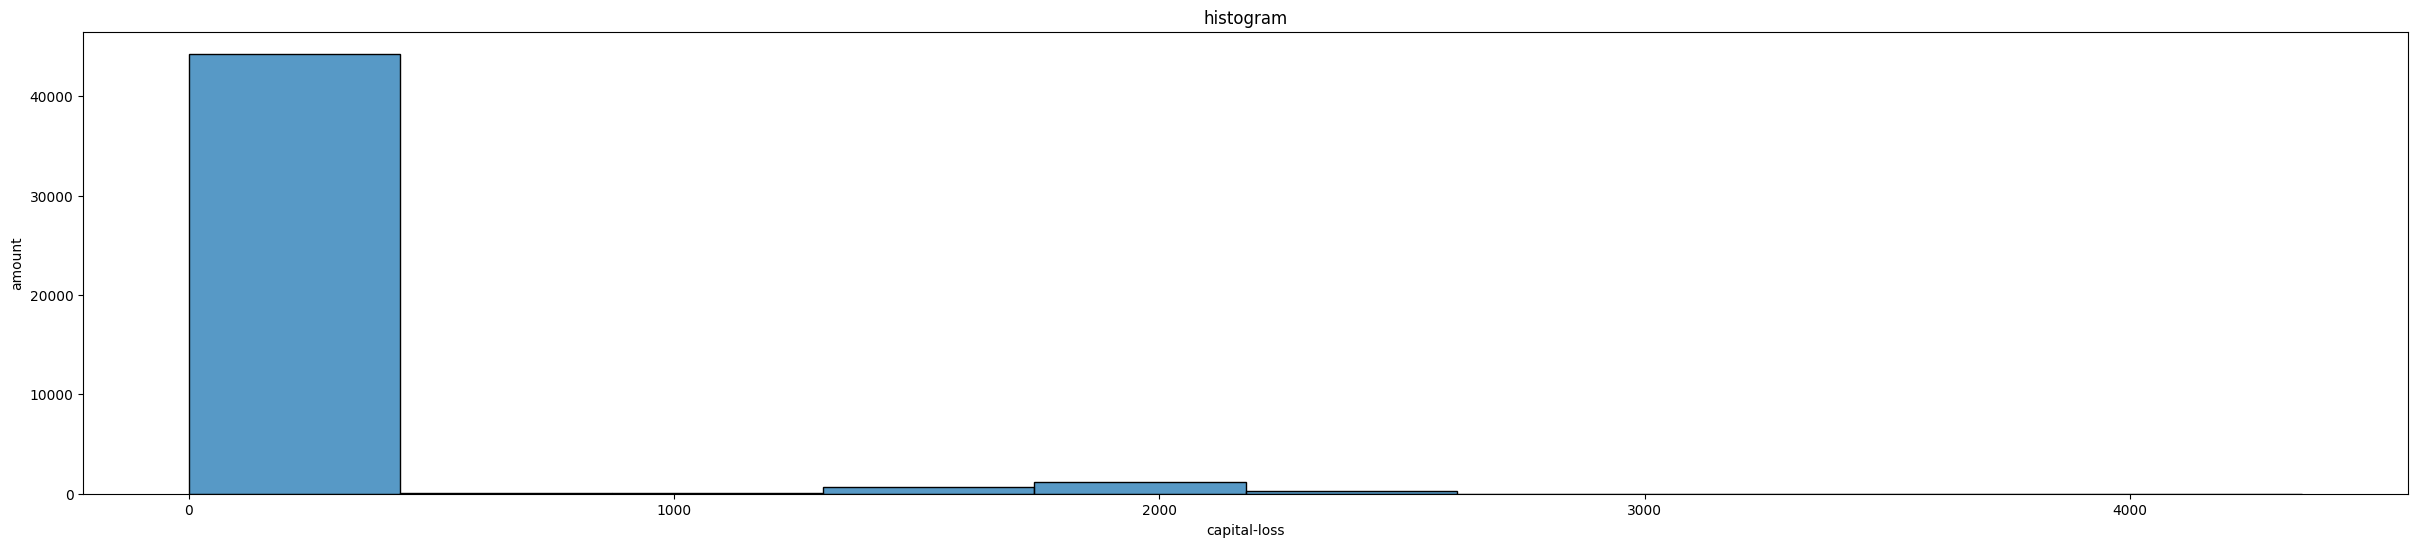

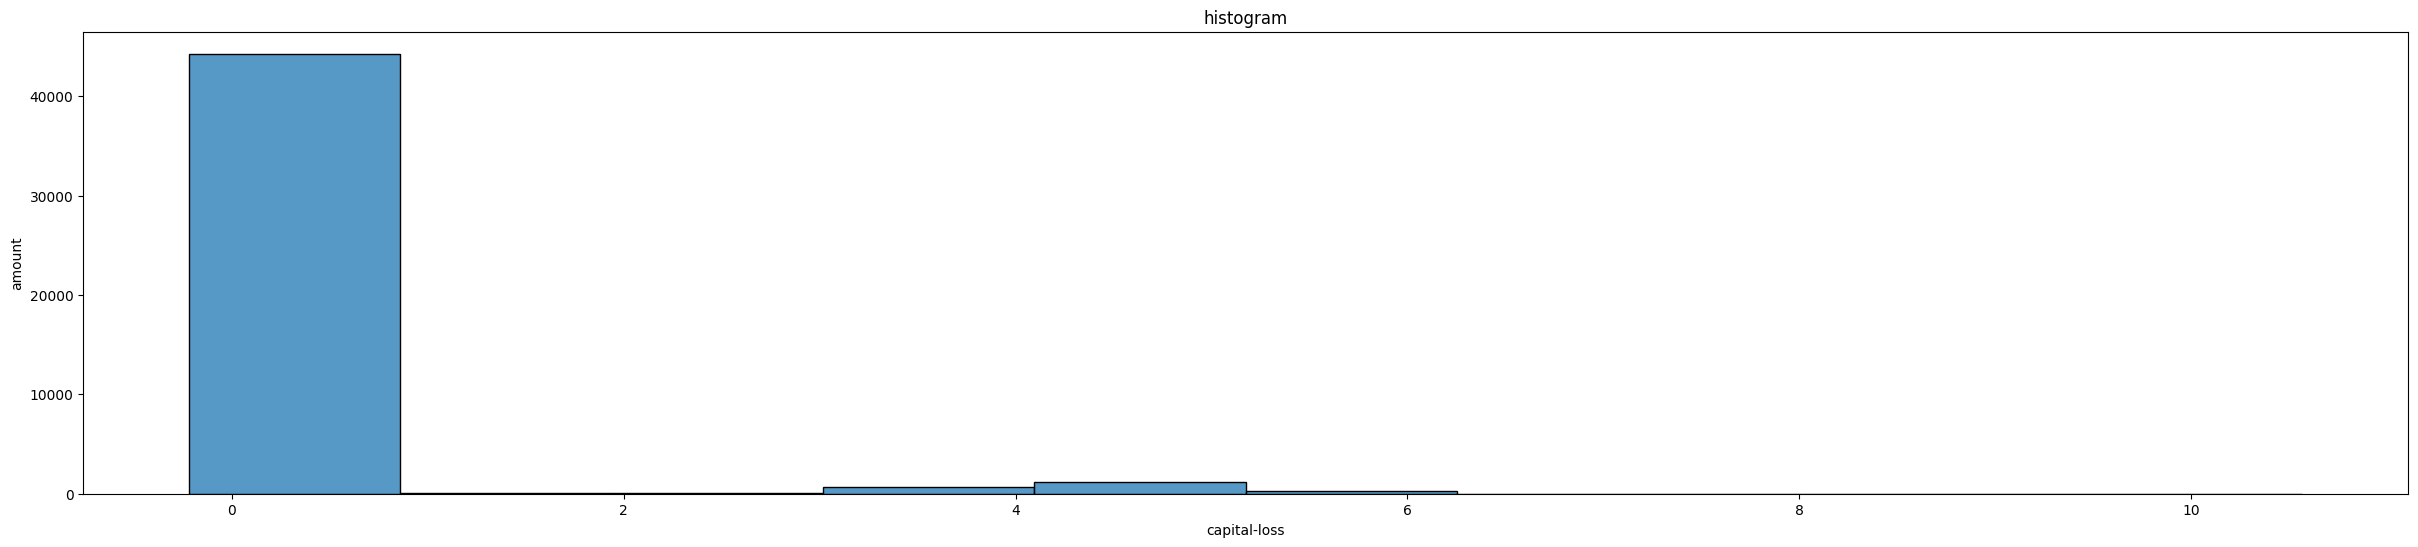

In [30]:
#3
def plot3(df, cat):
    plt.figure(figsize=(30,6))
    plt.title("histogram")
    plt.xlabel(cat)
    plt.ylabel("amount")
    sns.histplot(df[cat], bins=10)
    
cat = 'capital-loss'

plot3(df, cat)
plot3(standard(df), cat)

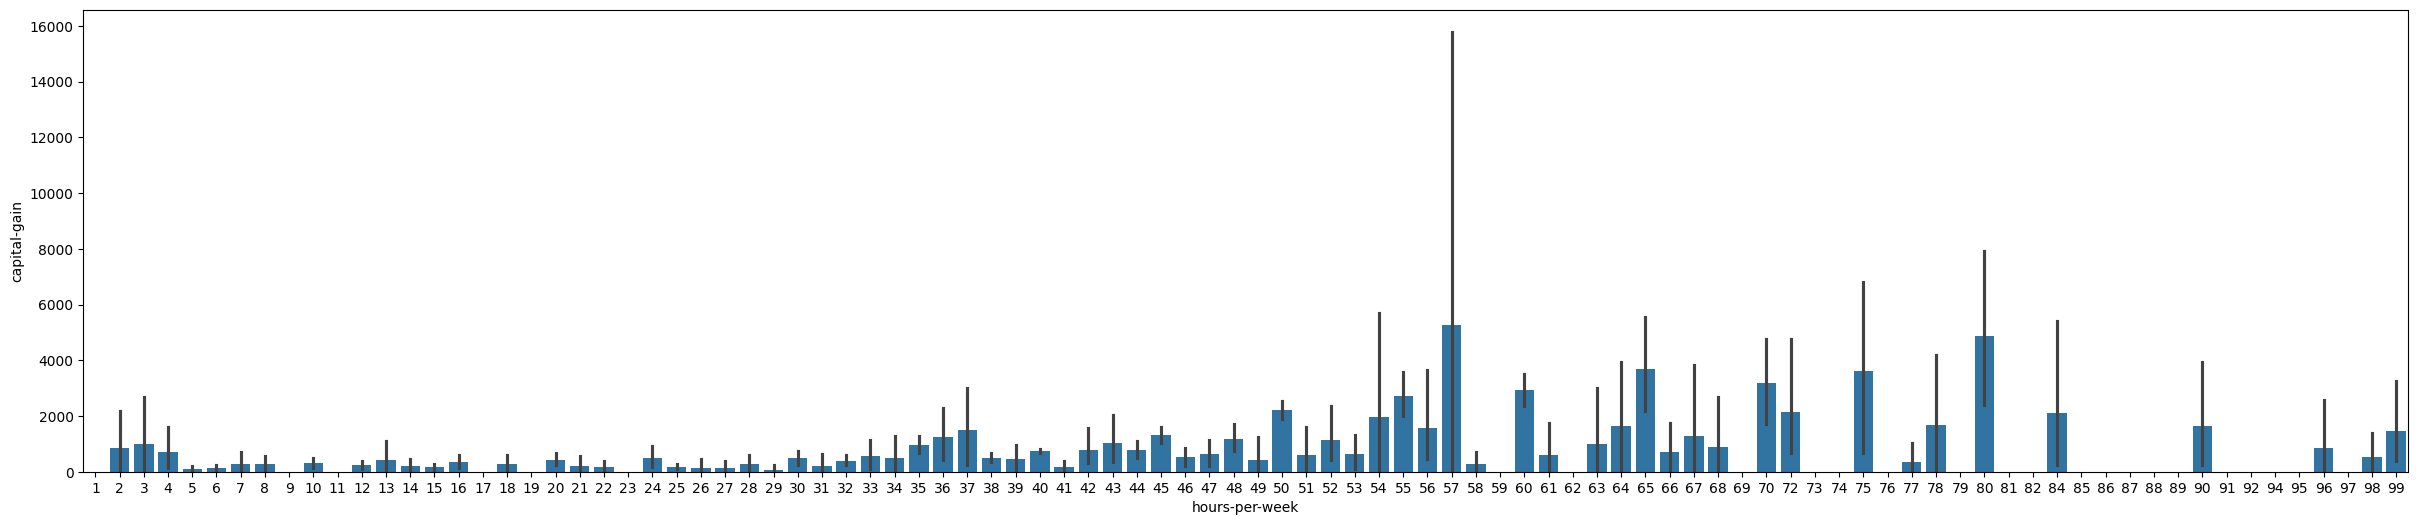

In [110]:
#4
def plot4(df):
    plt.figure(figsize=(30,6))
    sns.barplot(x=df['hours-per-week'], y=df['capital-gain'])

plot4(df)


In [7]:
#5
print("Pearson:", scipy.stats.pearsonr(df["hours-per-week"], df["capital-loss"]))
print("Spearman:", scipy.stats.spearmanr(df["hours-per-week"], df["capital-loss"]))

Pearson: PearsonRResult(statistic=0.05329355113071334, pvalue=1.431247272801236e-30)
Spearman: SignificanceResult(statistic=0.059247450370006144, pvalue=2.145765041748744e-37)


In [26]:
#6
def hot(df, cat):
    result_df = df
    encoder = sklearn.preprocessing.OneHotEncoder(sparse_output=False)
    one_hot = encoder.fit_transform(result_df[[cat]])
    one_hot_df = pd.DataFrame(one_hot, columns=encoder.get_feature_names_out([cat]))
    result_df = pd.concat([result_df, one_hot_df], axis=1)
    result_df = result_df.drop([cat], axis=1)
    return result_df

cat = "sex"
print(hot(df, cat))

        age         workclass    fnlwgt  education  education-num  \
0      39.0         State-gov   77516.0  Bachelors           13.0   
1      50.0  Self-emp-not-inc   83311.0  Bachelors           13.0   
2      38.0           Private  215646.0    HS-grad            9.0   
3      53.0           Private  234721.0       11th            7.0   
4      28.0           Private  338409.0  Bachelors           13.0   
...     ...               ...       ...        ...            ...   
32530   NaN               NaN       NaN        NaN            NaN   
32531   NaN               NaN       NaN        NaN            NaN   
32539   NaN               NaN       NaN        NaN            NaN   
32541   NaN               NaN       NaN        NaN            NaN   
32542   NaN               NaN       NaN        NaN            NaN   

           marital-status         occupation   relationship   race  \
0           Never-married       Adm-clerical  Not-in-family  White   
1      Married-civ-spouse    Ex

c:\Users\Denys\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\Users\Denys\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
c:\Users\Denys\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
c:\Users\Denys\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an e

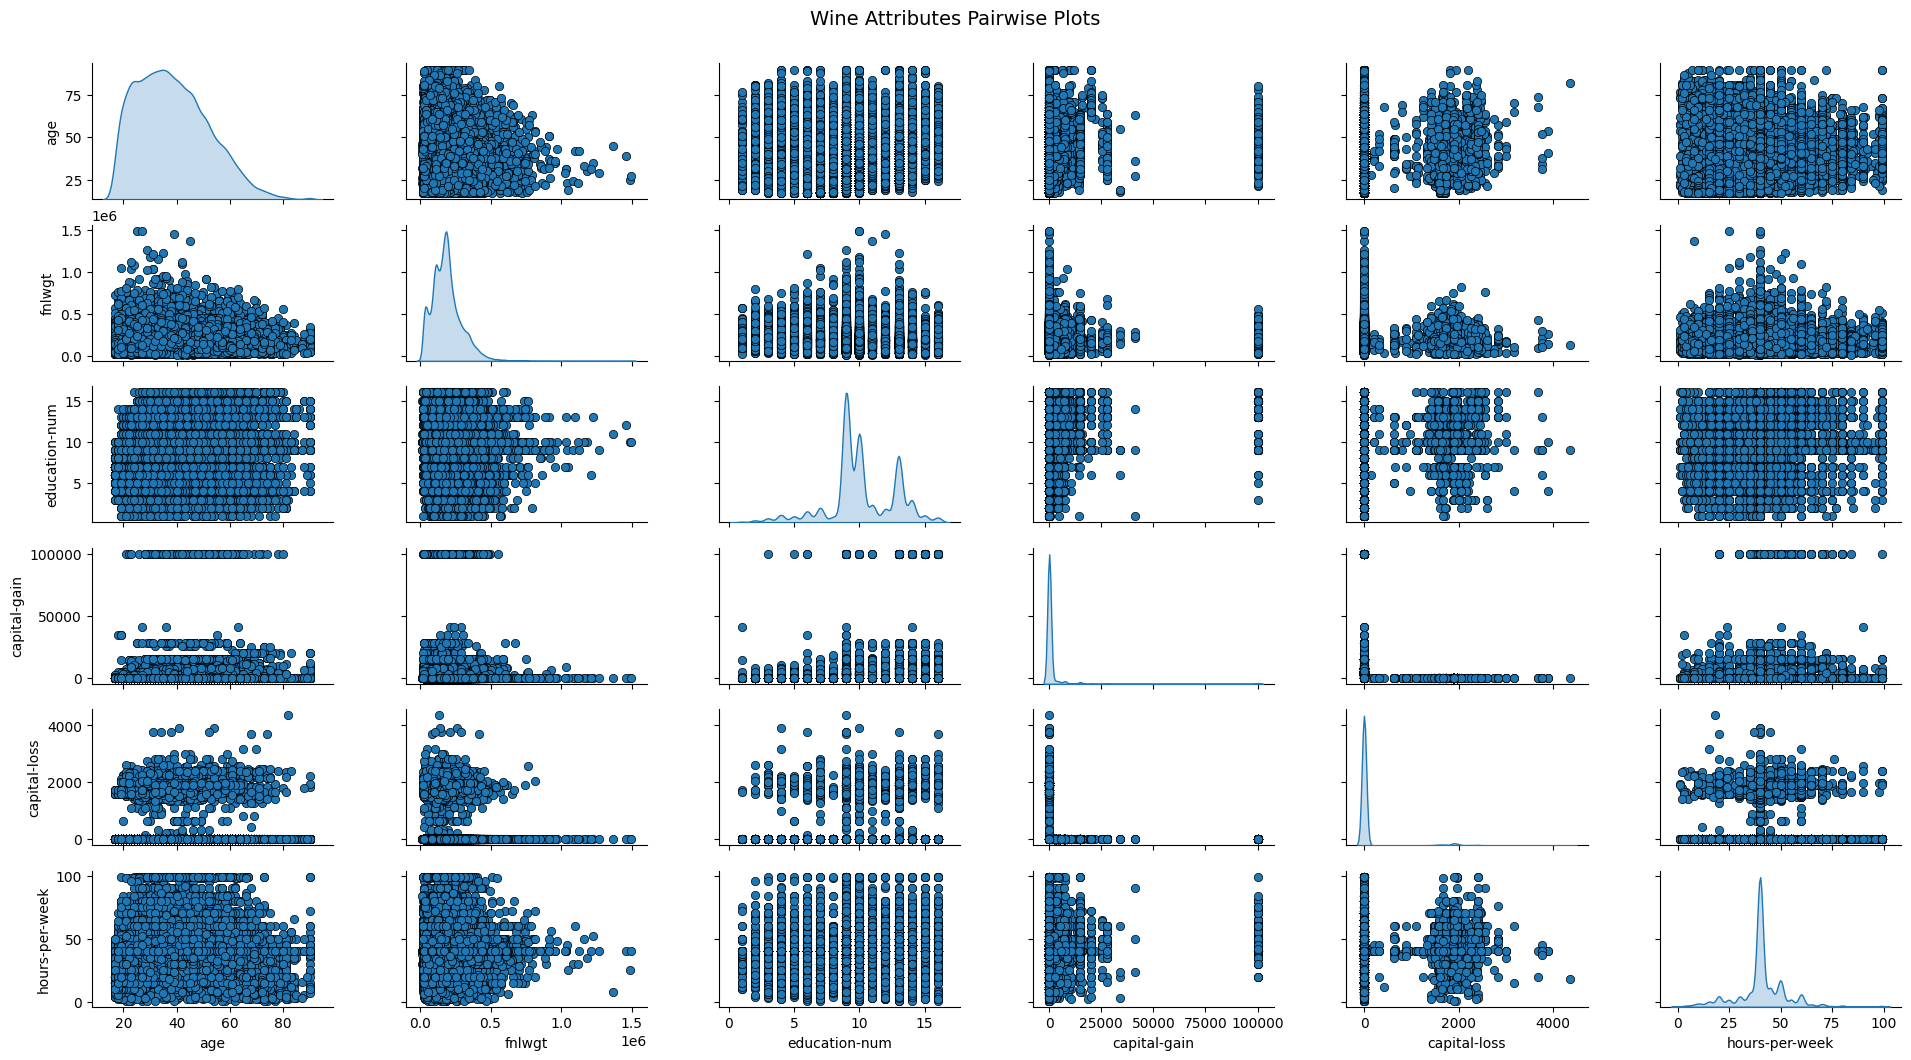

In [39]:
#7
cols = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
pp = sns.pairplot(df[cols], size=1.8, aspect=1.8,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(shade=True))

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Wine Attributes Pairwise Plots', fontsize=14)
